### Hugging Face Transformers 라이브러리 BLIP 모델로 예시 이미지의 캡션 생성

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from transformers import BlipProcessor, BlipForConditionalGeneration  # 캡션 생성하는 모델 불러오기

# 모델과 프로세서 로드
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

-- 입력한 이미지 파일 --


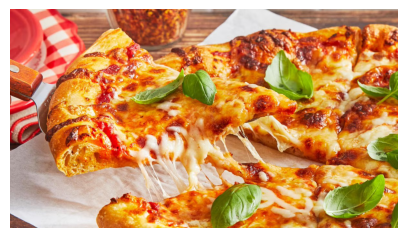

-- 생성한 캡션 -- 
 a pizza with cheese and basil leaves on it


In [73]:
# 이미지 로드
image_path = "/Users/dgriii0606/Downloads/example image and caption/example3.jpg"
image = Image.open(image_path).convert("RGB")  # 이미지를 로드한 후 RGB 형식으로 변환

# 캡션 생성
inputs = processor(images=image, return_tensors="pt")  # 이미지를 파이토치 텐서로 변환
outputs = model.generate(**inputs)  # 이미지에 대한 캡션 생성

# 결과 출력해서 담기
caption = processor.decode(outputs[0], skip_special_tokens=True)  # 생성된 캡션 디코딩 작업

# 입력한 이미지 출력
print("-- 입력한 이미지 파일 --")

image = Image.open(image_path)
plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.axis("off")
plt.show()

# 캡션 출력
print("-- 생성한 캡션 -- \n", caption)

In [81]:
## 입력한 프롬프트를 추가해서 상세한 이미지 설명 생성하기
text_prompt = ["I'm hungry", "My hometown", "A boy"] # 덧붙일 텍스트 입력

for i in text_prompt:
    
    inputs = processor(images=image, text=i, return_tensors="pt")
    outputs = model.generate(**inputs)

    print(processor.decode(outputs[0], skip_special_tokens=True))

i ' m hungry with this pizza recipe
my hometown pizza - pizzas & restaurants - 516 - 959
a boy is eating a pizza with a fork
